In [229]:
from dotenv import load_dotenv
from functions.MySQL_io import MySQLConnection
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [230]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [231]:
load_dotenv()

user = os.getenv('SQL_USER')
password = os.getenv('SQL_PASSWORD')
database = os.getenv('DATABASE')
port = os.getenv('SQL_PORT')
server = os.getenv('SQL_SERVER')

In [232]:
con = MySQLConnection(port, database, user, password, server)

lap_data = con.run_query(query='''
    SELECT
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN year <= 2022 THEN CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END ELSE 0 END FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        0 AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM cleaned_session_data
    where sprint_flag = 1 and
    LapTimeQ is not NULL
    UNION ALL
    SELECT
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END AS FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        CASE WHEN isnull(LapTimeFP3) THEN 1 ELSE 0 END AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM cleaned_session_data
    where sprint_flag = 0 and
    LapTimeQ is not NULL 
    ''')

# Data Cleaning

In [233]:
lap_data = lap_data.astype(float)

In [234]:
lap_data.count()

LapTimeFP1          2570
CompoundFP1         2570
AirTempFP1          2570
RainfallFP1         2570
TrackTempFP1        2570
FP1_Missing_Flag    2570
LapTimeFP2          2570
CompoundFP2         2570
AirTempFP2          2570
RainfallFP2         2570
TrackTempFP2        2570
FP2_Missing_Flag    2570
LapTimeFP3          2570
CompoundFP3         2570
AirTempFP3          2570
RainfallFP3         2570
TrackTempFP3        2570
FP3_Missing_Flag    2570
LapTimeQ            2570
AirTempQ            2570
RainfallQ           2570
is_sprint           2570
traction            2570
tyre_stress         2570
asphalt_grip        2570
braking             2570
asphalt_abrasion    2570
lateral_force       2570
track_evolution     2570
downforce           2570
dtype: int64

In [235]:
lap_data.head()

,LapTimeFP1,CompoundFP1,AirTempFP1,RainfallFP1,TrackTempFP1,FP1_Missing_Flag,LapTimeFP2,CompoundFP2,AirTempFP2,RainfallFP2,...,RainfallQ,is_sprint,traction,tyre_stress,asphalt_grip,braking,asphalt_abrasion,lateral_force,track_evolution,downforce
0,88.449,2.0,25.4,0.0,46.9,0.0,91.188,1.0,25.2,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
1,88.163,1.0,25.5,0.0,47.2,0.0,90.800,2.0,25.2,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
2,88.873,2.0,25.9,0.0,49.0,0.0,91.289,1.0,25.3,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
3,87.828,1.0,26.1,0.0,48.8,0.0,90.277,2.0,25.4,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
4,89.597,2.0,25.6,0.0,47.7,0.0,92.041,2.0,25.4,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0


In [236]:
lap_data.isna().sum()

LapTimeFP1          0
CompoundFP1         0
AirTempFP1          0
RainfallFP1         0
TrackTempFP1        0
FP1_Missing_Flag    0
LapTimeFP2          0
CompoundFP2         0
AirTempFP2          0
RainfallFP2         0
TrackTempFP2        0
FP2_Missing_Flag    0
LapTimeFP3          0
CompoundFP3         0
AirTempFP3          0
RainfallFP3         0
TrackTempFP3        0
FP3_Missing_Flag    0
LapTimeQ            0
AirTempQ            0
RainfallQ           0
is_sprint           0
traction            0
tyre_stress         0
asphalt_grip        0
braking             0
asphalt_abrasion    0
lateral_force       0
track_evolution     0
downforce           0
dtype: int64

### Test Train Split (80 - 20)

In [237]:
train_data = lap_data.sample(frac=0.8, random_state=0)
test_data = lap_data.drop(train_data.index)

# Data Exploration

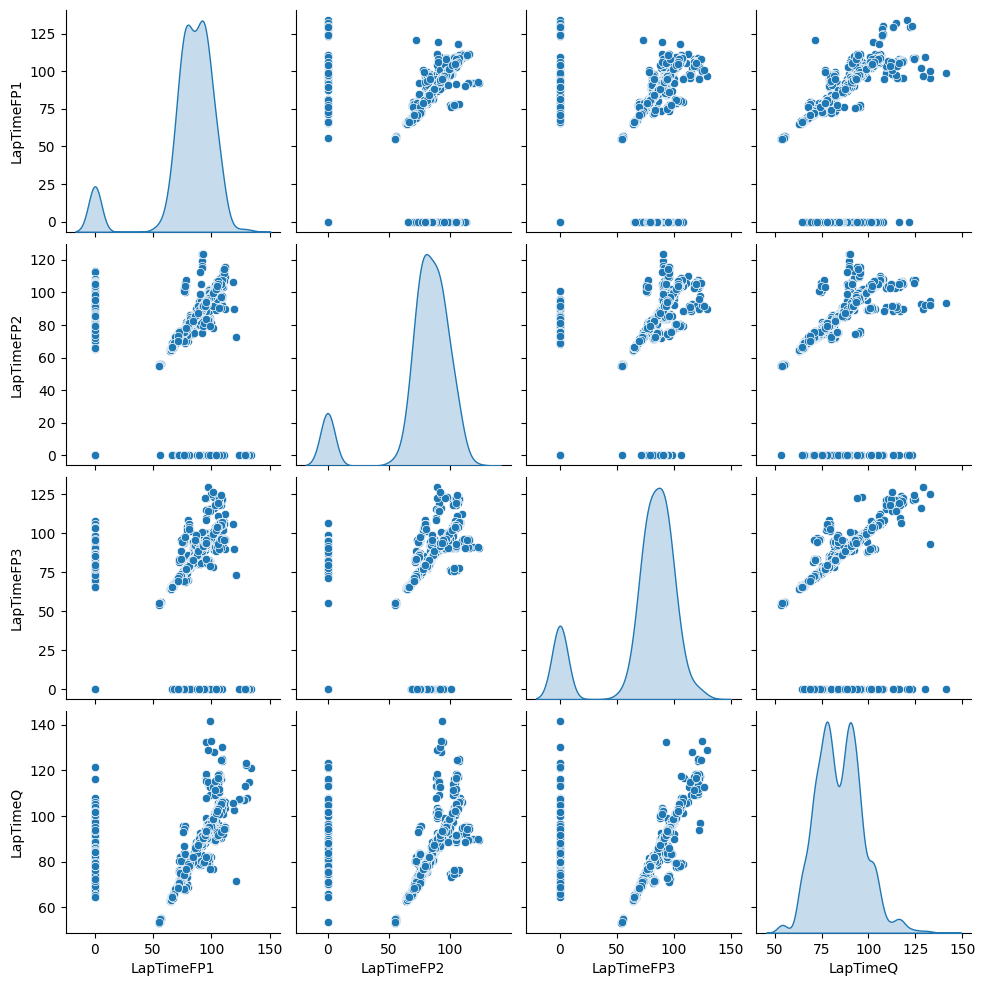

In [238]:
sns.pairplot(train_data[['LapTimeFP1', 'LapTimeFP2', 'LapTimeFP3', 'LapTimeQ']], diag_kind='kde')

In [239]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LapTimeFP1,2056.0,80.486803,25.584061,0.000,75.38300,85.2865,95.05675,134.002
CompoundFP1,2056.0,1.380350,0.913954,0.000,1.00000,1.0000,2.00000,5.000
AirTempFP1,2056.0,22.058658,8.044845,0.000,18.80000,23.1000,27.40000,36.200
RainfallFP1,2056.0,0.037451,0.189911,0.000,0.00000,0.0000,0.00000,1.000
TrackTempFP1,2056.0,33.924416,13.086433,0.000,26.90000,37.0000,42.50000,59.200
FP1_Missing_Flag,2056.0,0.073930,0.261721,0.000,0.00000,0.0000,0.00000,1.000
LapTimeFP2,2056.0,77.402793,27.461641,0.000,74.03925,82.3545,92.71650,123.821
CompoundFP2,2056.0,1.199416,0.811187,0.000,1.00000,1.0000,1.00000,5.000
AirTempFP2,2056.0,21.709728,8.449807,0.000,19.30000,23.4000,27.00000,37.900
RainfallFP2,2056.0,0.028210,0.165613,0.000,0.00000,0.0000,0.00000,1.000


# Model Prep

In [240]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('LapTimeQ')
test_labels = test_features.pop('LapTimeQ')

### Normalization

In [241]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [242]:
normalizer.adapt(np.array(train_features))

In [243]:
normalizer.mean.numpy()

array([[8.0486801e+01, 1.3803502e+00, 2.2058657e+01, 3.7451360e-02,
        3.3924416e+01, 7.3929958e-02, 7.7402794e+01, 1.1994164e+00,
        2.1709728e+01, 2.8210117e-02, 3.2050728e+01, 2.5291828e-02,
        7.3957787e+01, 1.2300583e+00, 1.9960506e+01, 3.3560310e-02,
        3.0420816e+01, 2.3346303e-02, 2.3417461e+01, 3.9396886e-02,
        1.2013619e-01, 3.4163425e+00, 3.3535993e+00, 2.6201363e+00,
        3.1590466e+00, 2.9304476e+00, 3.1512647e+00, 3.6712062e+00,
        3.2928016e+00]], dtype=float32)

# Linear Model

In [244]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(units=1)
])

In [245]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [LapTimeQ]')
plt.legend()
plt.grid(True)

In [ ]:
linear_model.summary()

### Save Results

In [ ]:
test_results = pd.DataFrame()

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
test_results.to_csv('linear_model.csv')

In [ ]:
linear_model.save('linar_model.keras')

### Evaluation

In [ ]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [LapTimeQ]')
plt.ylabel('Predictions [LapTimeQ]')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [LapTimeQ]')
_ = plt.ylabel('Count')

In [ ]:
lap_data_test = con.run_query(query='''
    SELECT
        DriverNumber,
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END AS FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        CASE WHEN isnull(LapTimeFP3) THEN 1 ELSE 0 END AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM ml_project_prod.cleaned_session_data
    WHERE
	event_cd = 15 and
    year = 2024
    ''')

con.close_connection()

In [ ]:
test_features_actual = lap_data_test.copy()
test_labels_actual = test_features_actual[['LapTimeQ', 'DriverNumber']]
test_features_actual.pop('LapTimeQ')

In [ ]:
predict_df = pd.DataFrame()
for i in range(len(test_features_actual)):
    vals = pd.DataFrame()
    temp = test_features_actual.iloc[i].to_frame().transpose()
    temp = temp.astype(float)
    predicted_time = linear_model.predict(temp.drop(['DriverNumber'], axis = 1)).flatten()
    vals['DriverNumber'] = temp['DriverNumber']
    vals['predicted_time'] = predicted_time
    predict_df = pd.concat([predict_df, vals])

In [ ]:
predict_df = predict_df.sort_values('predicted_time')
predict_df['Predicted_POS'] = predict_df['predicted_time'].rank(method='first')

In [ ]:
test_labels_actual = test_labels_actual.sort_values('LapTimeQ')
test_labels_actual['actual_POS'] = test_labels_actual['LapTimeQ'].rank(method='first')

In [ ]:
final_df = pd.merge(test_labels_actual, predict_df, on='DriverNumber')

In [ ]:
final_df['Laptime_dif'] = final_df['LapTimeQ'] - final_df['predicted_time']

In [ ]:
final_df['POS_dif'] = final_df['actual_POS'] - final_df['Predicted_POS']

In [ ]:
final_df

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(final_df['LapTimeQ'], final_df['predicted_time'])
plt.xlabel('True Values [LapTimeQ]')
plt.ylabel('Predictions [predicted_time]')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(final_df['actual_POS'], final_df['Predicted_POS'])
plt.xlabel('True Values [POS]')
plt.ylabel('Predictions [POS]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = final_df['actual_POS'] - final_df['Predicted_POS']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Predicted_POS]')
_ = plt.ylabel('Count')

In [ ]:
error = final_df['LapTimeQ'] - final_df['predicted_time']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [LapTimeQ]')
_ = plt.ylabel('Count')